# Capstone 1:
## Police Killings in the US
A notebook by Harrison Baty

**Required Packages**: Python (3.7), Pandas, Numpy, Seaborn, Matplotlib (pyplot), Scipy (stats)


# Overview
The topic being covered in this notebook is police shootings in the USA. During recent years following the 2014 killing of Michael Brown in Ferguson, Missouri, a nationwide focus on police accountability has been apparent. Starting in 2015 The Washington Post has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. The analysis below examines the data and answers relevant questions that can be used to better inform multiple stakeholders.

This data is interesting because it concerns the safety of our citizens. Better understanding what trends are emerging in episodes of police shootings and why these shootings are happening is an important first step toward eliminating them. This notebook will hopefully serve as a stepping off point for further analysis of police shooting activity.


# Hypothesis
The null hypothesis we will be challenging in this notebook is, there is no significant difference in the age of minority and white victims of police shootings on average. The alternative hypothesis is, there is a significant difference in the age of minority and white victims of police shootings on average.

This questions is important because currently there is discussion around the idea of unequal treatment of individuals of different races by police. Understanding if there is a meaningful difference in the average age of white and minority victims of police killings will be a useful first step to looking into the motives or explanations of this mistreatment of justice.


# Data
Due to the nature of the issue we will be discussing it is important to understand how the data we are using was collected. The Washington Post compiled this data from law enforcement websites, local news reports, social media, and by monitoring independent databases. It is important to note that this list is by no means exhaustive, it is difficult to find reliable data regarding this issue because many police killings haven't been comprehensively documented. The data includes more than a dozen details about each killing - including the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental health crisis.


### Data Processing:
The below shows the importation of the data, dropping of null values, and separation into the two datasets that will be compared. The two datasets created from the initial table contain all the fields for police shooting victims of race 'W' (White) and not race 'W' (effectively all minority or non-white).


In [72]:
# Initializing the environment
%matplotlib inline
import math
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

# creating the 95% confidence interval function
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

# import and read data
data = 'PoliceKillingsUS.csv'
experiment_data = pd.read_csv(data, encoding='cp1252')

experiment_data.info()

experiment_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [73]:
# dropping rows with any null values for simplicity
experiment_data_nonull = experiment_data.dropna()
experiment_data_nonull.info()

# creating two datasets for minority and white shooting victims
minority_data = experiment_data_nonull[experiment_data_nonull['race'] != 'W']
white_data = experiment_data_nonull[experiment_data_nonull['race'] == 'W']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2254 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2254 non-null   int64  
 1   name                     2254 non-null   object 
 2   date                     2254 non-null   object 
 3   manner_of_death          2254 non-null   object 
 4   armed                    2254 non-null   object 
 5   age                      2254 non-null   float64
 6   gender                   2254 non-null   object 
 7   race                     2254 non-null   object 
 8   city                     2254 non-null   object 
 9   state                    2254 non-null   object 
 10  signs_of_mental_illness  2254 non-null   bool   
 11  threat_level             2254 non-null   object 
 12  flee                     2254 non-null   object 
 13  body_camera              2254 non-null   bool   
dtypes: bool(2), float64(1), 

# Methods
The methods used in this notebook are listed below with brief explanations. Understanding the tools used in any piece of analysis is key to gaining a more accurate understanding of any conclusions.

**Histograms** - A graphical display of data using bars of different heights where the height of each bar represents the number of data points that fall in that range. A histogram is used to show the shape and spread (distribution) of continuous sample data.

Histograms are commonly used to make a first visual inspection of the distribution of a dataset. In this notebook a histogram was generated for the two datasets being compared to gather some initial information about its distribution. The distributions seen below are fairly normal and after generating descriptive statistics to confirm this the data was ready to be analyzed with applicable statistical tests.

**Independent-samples T-Test** - A statistical test used to compare the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different.

The independent-samples t-test is used in this notebooks analysis of two samples in order to provide insight regarding the significant difference in the associated population means. After running the test and receiving a t-statistic with a larger absolute value than the critical value of 1.96 and a p-value of <.001 we rejected the null hypothesis.

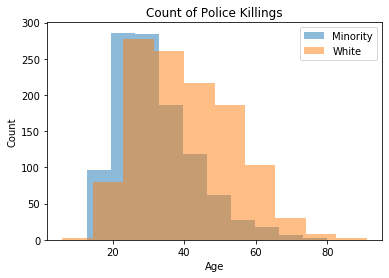

DescribeResult(nobs=1086, minmax=(13.0, 80.0), mean=32.24585635359116, variance=120.25931461160476, skewness=0.9907844594120286, kurtosis=1.051234209087867)
DescribeResult(nobs=1168, minmax=(6.0, 91.0), mean=39.98116438356164, variance=177.5591993285676, skewness=0.4422700902586822, kurtosis=-0.30075812036171623)


In [82]:
# checking the two new datasets for normal distribution by age
plt.hist(minority_data['age'], alpha = .5)
plt.hist(white_data['age'], alpha = .5)
plt.title('Count of Police Killings')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Minority','White'], loc="upper right")
plt.show()

# upon visual examination and confirmation by the skewness and kurtosis of both datasets, the distributions can be considered normal
print(stats.describe(minority_data['age']))
print(stats.describe(white_data['age']))

In [60]:
# testing for statistically significant differences in the means
print(stats.ttest_ind(minority_data['age'], white_data['age']))

# finding the 95% confidence interval of mean difference
get_95_ci(minority_data['age'], white_data['age'])

Ttest_indResult(statistic=-14.98511885675651, pvalue=1.8381454271033095e-48)


'The difference in means at the 95% confidence interval (two-tail) is between 6.730617536842639 and 8.739998523098325.'

[[Text(0, 0, 'minority age'), Text(0, 0, 'white age')],
 Text(0.5, 1.0, 'Difference in Average Age of Shooting Victim')]

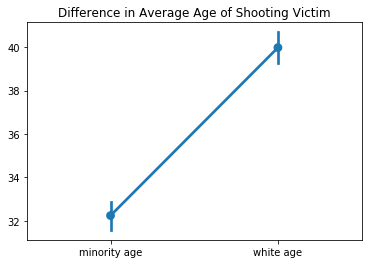

In [84]:
# a pointplot used to visualize the difference in means between the two victim groups.
ci_plot = sns.pointplot(data=[minority_data['age'],
                        white_data['age']], join=True)
                        
ci_plot.set(xticklabels = ['minority age', 'white age'], title = 'Difference in Average Age of Shooting Victim')

# Results
Upon completion of the above analysis, the null hypothesis was rejected and we can state that there is a significant difference in the age of minority and white victims of police shootings on average.

Specifically, the difference in means at the 95% confidence interval is between 6.73 and 8.74 years. These findings are interesting because it shows the need for further analysis to better understand where this difference is coming from and how we can explain it.


# Discussion
After receiving the results of the test it was clear that more analysis needs to be done on this topic. Yes, the average age of white and minority victims of police killings are different but this conclusion can only tell us about a small piece of what is going on.

Other information needed to improve the importance of this conclusion would be, what is the average life expectancy of these groups? what are the rates of mental illness in these groups? what ages do mental illness manifest in these groups? and what are the rates of violent crimes in these groups? Answers to these questions would provide another meaningful step towards understanding the true nature of the problem and how to solve it.

A great first step towards this goal would be to create a central body in charge of collecting and analyzing all policing data but especially  data around the killing of civilians.